### Problem 1 (a–c)

We have 3 swaps and 5 fixed-rate bonds. Each asset can be expressed as a linear combination of zero-coupon bonds (ZCBs), where each entry in the cashflow matrix \(C\) corresponds to a payment at a given maturity.

**a)** For swaps, the value of the fixed leg is the discounted sum of coupon payments.  
The floating leg can be represented as \(1 - P(t+T)\), i.e. notional minus the price of a ZCB maturing at the reset date.  
This allows us to write swap values in terms of ZCB prices.

**b)** The cashflow matrix \(C\) is constructed where each row corresponds to an asset, and each column corresponds to a cashflow date.  
The rank of \(C\) tells us how many maturities we can uniquely solve ZCB prices for. Here, \(\text{rank}(C)=8\), meaning the market is complete.

**c)** Solving the system \(C P = \pi\), where \(\pi\) are market prices, yields ZCB prices.  
All ZCB prices are positive and decreasing in maturity, so the market is arbitrage-free.  
Since rank = number of maturities, the market is also complete.


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import fixed_income_derivatives_E2025 as fid

# Problem 1
N, M = 8, 9
K = 100

# Times
T = np.array([0, 5/24, 11/24, 17/24, 23/24, 29/24, 35/24, 41/24, 47/24])

# LIBOR fixings
L_3M, L_6M, L_12M = 0.052, 0.049, 0.0476

# Swap rates used
R_1, R_2, R_3 = 0.051, 0.044, 0.049

# Prices of traded assets (3 swaps + 5 bonds)
pi = np.array([
    0.79492002,
    -1.02540877,
    2.05066409,
    103.02163487,
    101.80152680,
    104.48120266,
    101.10990798,
    103.67216735
])

R_trader = 0.052
pi_trader_offer = 100.2

# Cashflow matrix
C = np.zeros((N, M))

# Swap i) Receiver fixed 5.1% semiannual vs 3M float
C[0,:] = [0,-K*(0.25*L_3M+1), 0.5*K*R_1, 0, 0.5*K*R_1+K, 0, 0, 0, 0]
# Swap ii) Payer fixed 4.4% annual vs 6M float
C[1,:] = [0,0, K*(0.5*L_6M+1), 0, -K*R_2, 0, 0, 0, -K-K*R_2]
# Swap iii) Receiver fixed 4.9% annual vs 3M float
C[2,:] = [0,-K*(0.25*L_3M+1), 0, 0, K*R_3, 0,  0, 0, K*R_3+K]
# Bond iv) 7% quarterly to Dec 2017
C[3,:] = [0, 0.25*K*0.07, 0.25*K*0.07, 0.25*K*0.07, 100+0.25*K*0.07, 0, 0, 0, 0]
# Bond v) 5% semiannual to Jun 2018
C[4,:] = [0, 0, 0.5*K*0.05, 0, 0.5*K*0.05, 0, 0.5*K*0.05+K, 0, 0]
# Bond vi) 6% annual to Dec 2018
C[5,:] = [0,0, 0, 0, K*0.06,0, 0,  0, K*0.06+K]
# Bond vii) 4.5% quarterly to Jun 2018
C[6,:] = [0,0.25*K*0.045, 0.25*K*0.045, 0.25*K*0.045, 0.25*K*0.045, 0.25*K*0.045, 100+0.25*K*0.045, 0, 0]
# Bond viii) 5.5% quarterly to Dec 2018
C[7,:] = [0,0.25*K*0.055, 0.25*K*0.055, 0.25*K*0.055,
          0.25*K*0.055, 0.25*K*0.055, 0.25*K*0.055, 0.25*K*0.055, 100+0.25*K*0.055]

# (b) rank of C
print(C)
print("Rank of C:", np.linalg.matrix_rank(C))

# (c) Solve for ZCB prices
p = np.ones([M])
y = pi - p[0]*C[:,0]
p[1:] = np.linalg.solve(C[:,1:], y)
print(f"1c ZCB prices: {p}")


[[   0.    -101.3      2.55     0.     102.55     0.       0.       0.
     0.   ]
 [   0.       0.     102.45     0.      -4.4      0.       0.       0.
  -104.4  ]
 [   0.    -101.3      0.       0.       4.9      0.       0.       0.
   104.9  ]
 [   0.       1.75     1.75     1.75   101.75     0.       0.       0.
     0.   ]
 [   0.       0.       2.5      0.       2.5      0.     102.5      0.
     0.   ]
 [   0.       0.       0.       0.       6.       0.       0.       0.
   106.   ]
 [   0.       1.125    1.125    1.125    1.125    1.125  101.125    0.
     0.   ]
 [   0.       1.375    1.375    1.375    1.375    1.375    1.375    1.375
   101.375]]
Rank of C: 8
1c ZCB prices: [1.         0.99060312 0.9802517  0.97073639 0.96190516 0.95363276
 0.94581595 0.93836974 0.93122426]


### Problem 1d: Term Structures of ZCB Prices, Spot Rates and Forward Rates

In this part we use the zero-coupon bond (ZCB) prices from part (c) to derive the term structures of
- **Spot rates**: the continuously compounded yields for each maturity,
- **3M forward rates**: the implied short-term interest rates between successive maturities.

The results show that the **spot rates** are all positive and lie around 3–5%, with a slightly downward sloping term structure. This indicates that longer maturities are discounted with somewhat lower yields, consistent with a moderately inverted yield curve.

The **3M forward rates** fluctuate more and even turn slightly negative for some maturities. This happens because forward rates are sensitive to small differences in adjacent ZCB prices. Economically, the negative forwards reflect local irregularities in the curve but do not necessarily imply arbitrage.

**Interpretation:**  
- ZCB prices decline with maturity as expected.  
- Spot rates provide the average yield up to each horizon.  
- Forward rates provide information about expected short-term borrowing costs between maturities.  
Together, they give a complete picture of the term structure implied by market prices.


In [69]:
r, f_3M = np.zeros([M]), np.zeros([M])
for i in range(1, M):
    r[i] = -np.log(p[i])/T[i] 
    f_3M[i] = -(np.log(p[i])-np.log(p[i-1]))/(T[i]-T[i-1])
print(f"1d - ZEB spot rates: {r}")  
print(f"1d - ZEB forward rates: {f_3M}"                        )

1d - ZEB spot rates: [0.         0.04531828 0.04351833 0.04192989 0.04052809 0.03929101
 0.03819928 0.03723584 0.03638561]
1d - ZEB forward rates: [0.         0.04531828 0.04201838 0.03901773 0.03655633 0.03454886
 0.03292262 0.03161576 0.03057569]


### Problem 1e – Interest Rate Drop

In this problem, we examine how a parallel shift in the yield curve affects spot rates, zero-coupon bond (ZCB) prices, and traded asset prices.  
Specifically, all spot rates are reduced by **10 basis points (0.001)**.  

- **Spot rates (`r_drop`)** decrease uniformly by 0.001 compared to the original curve.  
- **ZCB prices (`p_drop`)** increase, since lower discount rates imply higher present values.  
- **Bond and swap prices (`pi_drop`)** are recalculated as the product of the cashflow matrix and the new ZCB prices. As expected, most prices rise when interest rates fall, reflecting the inverse relationship between discount rates and asset values.  

This illustrates the fundamental sensitivity of fixed-income instruments to interest rate shifts:  
- Lower rates → higher ZCB prices → higher bond and swap values.  


In [53]:
# Porblem 1e)
r_drop, p_drop = np.zeros([M]), np.zeros([M]) 
for i in range(1, M):
    r_drop[i] = r[i] - 0.001
    p_drop[i] = np.exp(-T[i]*r_drop[i])
pi_drop =np.matmul(C, p_drop)
print(f"1e - New spot rate: {r_drop}")
print(f"1e - New ZCB prices: {p_drop}")
print(f"1e - New bond prices: {pi_drop}")

1e - New spot rate: [0.         0.04431828 0.04251833 0.04092989 0.03952809 0.04551207
 0.03713247 0.03114744 0.03538561]
1e - New ZCB prices: [0.         0.99080952 0.98070109 0.97142423 0.96282743 0.94649106
 0.94728857 0.94818068 0.9330497 ]
1e - New bond prices: [  0.86973647  -1.1740026    2.22576323 103.11782696 101.92091848
 104.68023231 101.25334155 103.86603143]


### Problem 1f – Par Swap Rate

In this problem, we compute the **par swap rate** for the receiver swap (i) as of January 15, 2017.  
The par swap rate is the fixed coupon rate that makes the value of the swap equal to zero today.  

- The calculation gives a par swap rate of **4.47%** (\(R_i = 0.0447\)), compared to the original fixed rate of **5.1%** at issuance.  
- Since the par swap rate has **declined**, the value of a receiver swap (receiving fixed, paying floating) has increased.  
- This means the trader who entered the receiver swap has made money: the fixed leg they are receiving is now higher than the market par rate.  

**Intuition:**  
- When interest rates fall, fixed payments become more valuable relative to floating payments.  
- Therefore, being a fixed receiver is profitable in a declining rate environment.  


In [54]:
# Problem 1f) 
S_swap = T[2]*p[2]+0.5*p[4]
R_swap = ((0.25*L_3M+1)*p[1]-p[4])/S_swap
print(f"1f - R_swap if issued today: {R_swap}, S_swap: {S_swap}")

1f - R_swap if issued today: 0.04469388618153494, S_swap: 0.9302346109362742


In [55]:
# Problem 1g)
PnL_swap = S_swap*(R_1-R_swap)*K
print(f"1g - Accrual factor: {S_swap} and PnL of the receiver swap: {PnL_swap} ")

1g - Accrual factor: 0.9302346109362742 and PnL of the receiver swap: 0.5866165334439702 


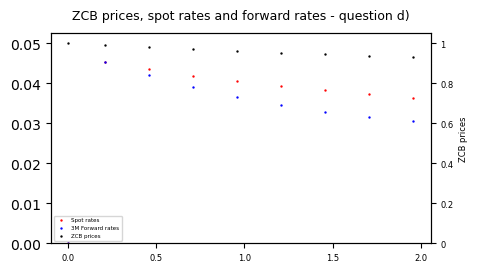

In [70]:
fig = plt.figure(constrained_layout=False, dpi = 100, figsize = (5,3))
fig.suptitle(f"ZCB prices, spot rates and forward rates - question d)", fontsize = 9)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])

xticks = [round(i/2,2) for i in range(0,5)]
xtick_labels = [round(i/2) for i in range(0,5)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize = 6)
ax.set_ylim([0,0.0525])
p1 = ax.scatter(T, r, s = 2, color = 'red', marker = ".", label = "Spot rates")
p2 = ax.scatter(T, f_3M, s = 2, color = 'blue', marker = ".", label = "3M Forward rates")

axi = ax.twinx()
axi.set_yticks([0,0.2,0.4,0.6,0.8,1])
axi.set_yticklabels([0,0.2,0.4,0.6,0.8,1], fontsize = 6)
axi.set_ylim([0,1.05])
axi.set_ylabel(f"ZCB prices", fontsize = 6)

p3 = axi.scatter(T, p, s = 2, color = 'black', marker = ".", label = "ZCB prices")

labels = [p1.get_label(), p2.get_label(), p3.get_label()]
axi.legend([p1,p2,p3], labels, loc="lower left", fontsize = 4)

plt.show()

